In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, ShuffleSplit
from utils import plot_learning_curve, my_load_wine, get_estimator_final_score, plot_loss_curve, one_hot_encoding
import mlrose_hiive as mlrose
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Finding the weights of a neural network

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

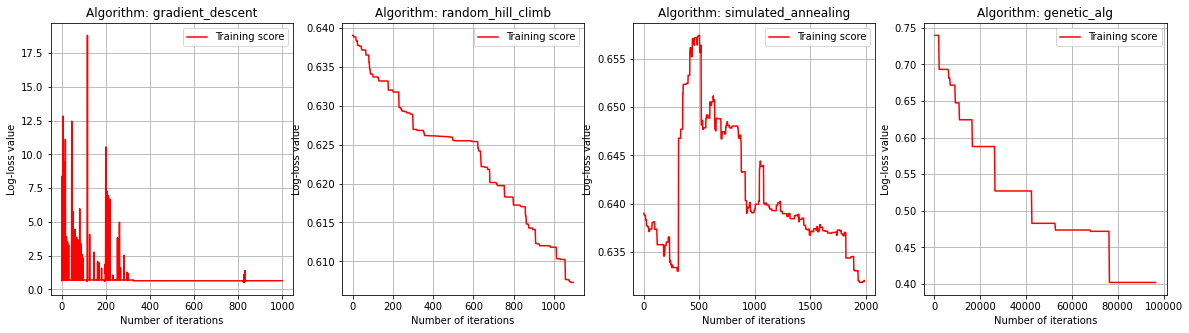

In [13]:
algorithms = ["gradient_descent", "random_hill_climb", "simulated_annealing", "genetic_alg"]
_, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, alg in enumerate(algorithms):
    axe_to_plot = axes[i]
    estimator = mlrose.NeuralNetwork([10, 10], algorithm=alg, activation="sigmoid", max_iters=1000, early_stopping=True, max_attempts=100, random_state=42, curve=True)
    title = f"Algorithm: {alg}" 
    plot_loss_curve(estimator, title, X_train, y_train, axes=axe_to_plot)

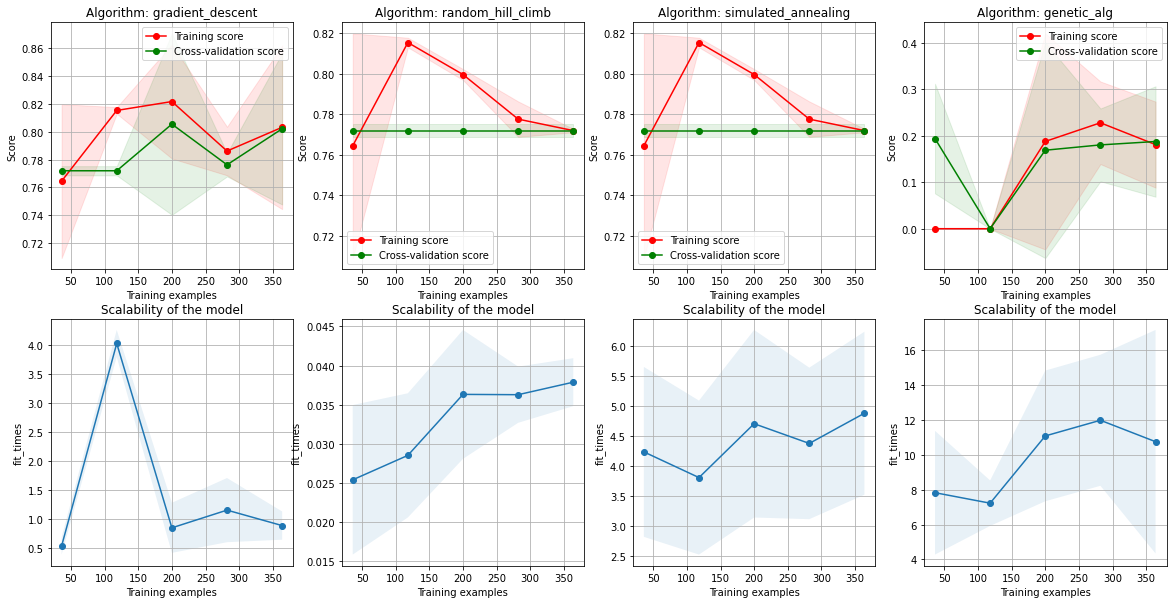

In [3]:
algorithms = ["gradient_descent", "random_hill_climb", "simulated_annealing", "genetic_alg"]
_, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.transpose()
ylim = (0, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, alg in enumerate(algorithms):
    estimator = mlrose.NeuralNetwork([10, 10], algorithm=alg, activation="sigmoid", max_iters=1000, early_stopping=True, max_attempts=10,random_state=42, curve=True)
    title = f"Algorithm: {alg}"
    plot_learning_curve(estimator, title, X_train, y_train, axes=axes[i], n_jobs=16, scoring="f1", detailed=False)

In [5]:
algorithms = ["gradient_descent", "random_hill_climb", "simulated_annealing", "genetic_alg"]
for i, alg in enumerate(algorithms):
    estimator = mlrose.NeuralNetwork([10, 10], algorithm=alg, activation="sigmoid", max_iters=1000, early_stopping=True, max_attempts=10,random_state=42, curve=True)
    get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, f"algorithm: {alg}", "f1")

Test f1 score for algorithm: gradient_descent: 0.7675675675675676
Test f1 score for algorithm: random_hill_climb: 0.7675675675675676
Test f1 score for algorithm: simulated_annealing: 0.7675675675675676
Test f1 score for algorithm: genetic_alg: 0.0


In [6]:
algorithms = ["gradient_descent", "random_hill_climb", "simulated_annealing", "genetic_alg"]
for i, alg in enumerate(algorithms):
    estimator = mlrose.NeuralNetwork([10, 10], algorithm=alg, activation="sigmoid", max_iters=1000, early_stopping=True, max_attempts=10,random_state=42, curve=True)
    get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, f"algorithm: {alg}", "accuracy")

Test accuracy score for algorithm: gradient_descent: 0.6228070175438597
Test accuracy score for algorithm: random_hill_climb: 0.6228070175438597
Test accuracy score for algorithm: simulated_annealing: 0.6228070175438597
Test accuracy score for algorithm: genetic_alg: 0.37719298245614036
